In [1]:
pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [11]:
import pandas as pd

# Fetch the dataset
online_retail = fetch_ucirepo(id=352)

# Data (as pandas DataFrame)
df = online_retail.data.features  # Use 'features' to get the data

# Q1.1: Clean the dataset
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing CustomerID or Description, which are essential
df = df.dropna(subset=['CustomerID', 'Description'])

# Remove duplicates
df = df.drop_duplicates()

# Remove rows with negative quantities
df = df[df['Quantity'] > 0]

# Display the cleaned dataset
print("Cleaned Dataset Head:\n", df.head())


Missing values per column:
 Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Cleaned Dataset Head:
                            Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  


The dataset is does not have missing values, does not contain duplicate or irrelevant entries. Proper data cleaning improves the quality of the dataset, leading to more accurate insights and inferences

In [12]:
# Q1.2: Descriptive statistics for relevant columns
desc_stats = df[['Quantity', 'UnitPrice']].describe()
print("Descriptive Statistics:\n", desc_stats)

# Convert 'InvoiceDate' to datetime format if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year for further analysis
df['Month'] = df['InvoiceDate'].dt.to_period('M')


Descriptive Statistics:
             Quantity      UnitPrice
count  392657.000000  392657.000000
mean       13.154282       3.125758
std       181.605406      22.242808
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


The descriptive statistics for the Quantity and UnitPrice columns provide a summary of the distribution of these variables.

Quantity Distribution:

High Variability: The standard deviation of 181.61 compared to the mean of 13.15 indicates that there is significant variability in the quantity of items per transaction. Some transactions involve very large quantities, as evidenced by the maximum value of 80,995.
Outliers: The high maximum value suggests that there might be some outliers or bulk purchases which are much larger than typical transactions.
Central Tendency: Most transactions involve a relatively small number of items, with 75% of transactions having 12 or fewer items.

UnitPrice Distribution:

High Variability: The standard deviation of 22.24 is quite high compared to the mean unit price of 3.13, indicating a wide range of prices. The maximum unit price of 8,142.75 is significantly higher than the 75th percentile value of 3.75, suggesting the presence of high-priced items or potential pricing errors.
Central Tendency: The median price of 1.95 indicates that the majority of transactions are for items priced around this amount, while the mean is higher due to a few extremely high-priced items.

In [13]:
# Q2.1: Top 10 best-selling products by quantity
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
print("Top 10 Best-Selling Products:\n", top_products)


Top 10 Best-Selling Products:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30915
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


This analysis provides a clear picture of which products are driving the most sales by quantity.

In [14]:
# Calculate total sales per product
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Q2.2: Total revenue generated by each product
product_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
print("Total Revenue by Each Product:\n", product_revenue)


Total Revenue by Each Product:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              142264.750
WHITE HANGING HEART T-LIGHT HOLDER    100392.100
JUMBO BAG RED RETROSPOT                85040.540
MEDIUM CERAMIC TOP STORAGE JAR         81416.730
                                         ...    
PURPLE FRANGIPANI HAIRCLIP                 0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: TotalSales, Length: 3877, dtype: float64


The top products by total revenue, such as "PAPER CRAFT, LITTLE BIRDIE" and "REGENCY CAKESTAND 3 TIER," are significant revenue contributors. These products are likely popular and/or priced higher, leading to substantial revenue generation. Products like "PADS TO MATCH ALL CUSHIONS" and "HEN HOUSE W CHICK IN NEST" contribute very little to total revenue. These might be niche items or have low sales volumes. This analysis highlights the disparity in revenue among products.

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month', ylabel='Revenue'>

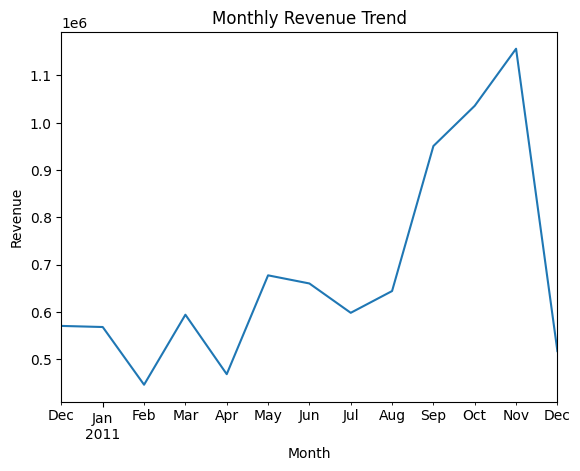

In [15]:
# Q2.3: Monthly revenue trend
monthly_revenue = df.groupby('Month')['TotalSales'].sum()

# Plot the monthly revenue trend
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', xlabel='Month', ylabel='Revenue')


There is a noticeable dip in revenue from January to March.  From April to August, there’s a steady increase, with some fluctuations, peaking in July. Revenue surges between September and November, peaking sharply in November. After the peak in November, there is a sharp decline in revenue in December.

In [21]:
# Q3.1 Alternative: Number of unique customers
unique_customers = df['CustomerID'].nunique()
print("Unique Customers:", unique_customers)

# Total transactions per customer
transactions_per_customer = df['CustomerID'].value_counts()
repeat_customers_count = transactions_per_customer[transactions_per_customer > 1].count()
repeat_sales_percentage = (repeat_customers_count / unique_customers) * 100

print("Number of Repeat Customers:", repeat_customers_count)
print("Percentage of Repeat Customers:", repeat_sales_percentage)


Unique Customers: 4339
Number of Repeat Customers: 4267
Percentage of Repeat Customers: 98.34063148190828


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month', ylabel='Revenue'>

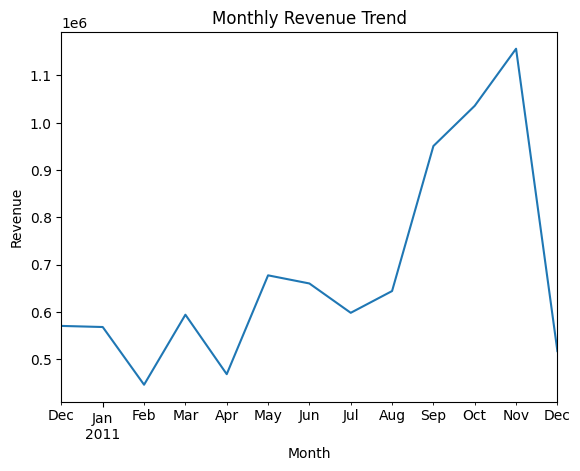

In [22]:
# Convert 'InvoiceDate' to datetime if it isn't already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from 'InvoiceDate' if not already done
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Q2.3: Monthly revenue trend
monthly_revenue = df.groupby('Month')['TotalSales'].sum()

# Plot the monthly revenue trend
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', xlabel='Month', ylabel='Revenue')


In [23]:
# Q3.3: Countries contributing most to sales revenue
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print("Sales Revenue by Country:\n", country_revenue)


Sales Revenue by Country:
 Country
United Kingdom          7283438.304
Netherlands              285446.340
EIRE                     265262.460
Germany                  228660.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13494.450
Austria                   10198.680
Poland                     7334.650
Israel                     7205.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      27

In [24]:
# Q4.1: Calculate the average revenue per transaction by country

# Total revenue and transaction count by country
country_revenue = df.groupby('Country')['TotalSales'].sum()
country_transactions = df.groupby('Country').size()

# Average revenue per transaction for each country
average_revenue_per_transaction = country_revenue / country_transactions

# Get the top 5 countries with the highest average revenue per transaction
top_5_countries = average_revenue_per_transaction.sort_values(ascending=False).head(5)

print("Top 5 Countries with Highest Average Revenue per Transaction:\n", top_5_countries)


Top 5 Countries with Highest Average Revenue per Transaction:
 Country
Netherlands    120.798282
Australia      116.937340
Japan          116.561900
Singapore       95.852658
Sweden          85.261844
dtype: float64


In [26]:
import pandas as pd

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month and season from the 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month
df['Season'] = df['InvoiceDate'].dt.month % 12 // 3 + 1  # Convert month to season (1: Winter, 2: Spring, 3: Summer, 4: Fall)

# Group by 'Description' (product name) and 'Month' to get total sales per product per month
monthly_product_sales = df.groupby(['Description', 'Month'])['TotalSales'].sum().reset_index()

# Find products with peak performance in specific months
peak_products_by_month = monthly_product_sales.sort_values(by='TotalSales', ascending=False).groupby('Description').head(3)

print("Products with Peak Performance in Specific Months:\n", peak_products_by_month)

# Group by 'Description' (product name) and 'Season' to get total sales per product per season
seasonal_product_sales = df.groupby(['Description', 'Season'])['TotalSales'].sum().reset_index()

# Find products with peak performance in specific seasons
peak_products_by_season = seasonal_product_sales.sort_values(by='TotalSales', ascending=False).groupby('Description').head(3)

print("Products with Peak Performance in Specific Seasons:\n", peak_products_by_season)



Products with Peak Performance in Specific Months:
                              Description  Month  TotalSales
17449        PAPER CRAFT , LITTLE BIRDIE     12  168469.600
14892     MEDIUM CERAMIC TOP STORAGE JAR      1   77183.600
18057     PICNIC BASKET WICKER 60 PIECES      6   39619.500
19765                 RABBIT NIGHT LIGHT     11   23190.410
20812           REGENCY CAKESTAND 3 TIER     12   22113.780
...                                  ...    ...         ...
1024          ACRYLIC JEWEL ICICLE, BLUE     11       0.380
11826  HAPPY BIRTHDAY CARD STRIPEY TEDDY     11       0.190
17135         PADS TO MATCH ALL CUSHIONS      9       0.001
17134         PADS TO MATCH ALL CUSHIONS      7       0.001
17133         PADS TO MATCH ALL CUSHIONS      4       0.001

[10722 rows x 3 columns]
Products with Peak Performance in Specific Seasons:
                             Description  Season  TotalSales
7284        PAPER CRAFT , LITTLE BIRDIE       1  168469.600
6225     MEDIUM CERAMIC TOP S

Top-Performing Products in Specific Months,

December: PAPER CRAFT, LITTLE BIRDIE generated the highest sales in December, with a total sales value of 168,469.60. This might suggest strong holiday demand for craft or decorative items.
REGENCY CAKESTAND 3 TIER also saw high sales, aligning with the holiday season when more people are likely to host events or parties requiring such items.

January: MEDIUM CERAMIC TOP STORAGE JAR had significant sales in January, with 77,183.60. This could indicate a post-holiday surge in storage-related items as people organize after the holidays.

June: PICNIC BASKET WICKER 60 PIECES saw its peak in June (39,619.50), likely due to the summer season when outdoor activities like picnics are more common.

November: RABBIT NIGHT LIGHT performed well in November, with 23,190.41 in sales. Given that this is a decorative or gift item, it aligns with pre-holiday shopping.

Top-Performing Products in Specific Seasons,

Season 1: PAPER CRAFT, LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR are standout performers in the winter season. The sales align with the holiday and post-holiday period when people tend to buy decorative and storage products.

Season 3: PICNIC BASKET WICKER 60 PIECES performed best in the summer, a time when customers are likely preparing for outdoor gatherings.
REGENCY CAKESTAND 3 TIER also performed well, indicating a preference for elegant dining or outdoor events.